# Introduction - Pytorch WorkFlow

Resources :

1. Yt vid : https://youtu.be/Z_ikDlimN6A?list=PLlx-Yw-SvHWrFWBUF2OyV064Gy9gayKU4&t=15665
2. Pytorch Doc :   https://pytorch.org/docs/stable/torch.html
3. Follow-along doc : https://www.learnpytorch.io/01_pytorch_workflow/
4. Geeksforgeeks as ref : https://www.geeksforgeeks.org/ml-introduction-data-machine-learning/




**The WorkFlow Diagram**

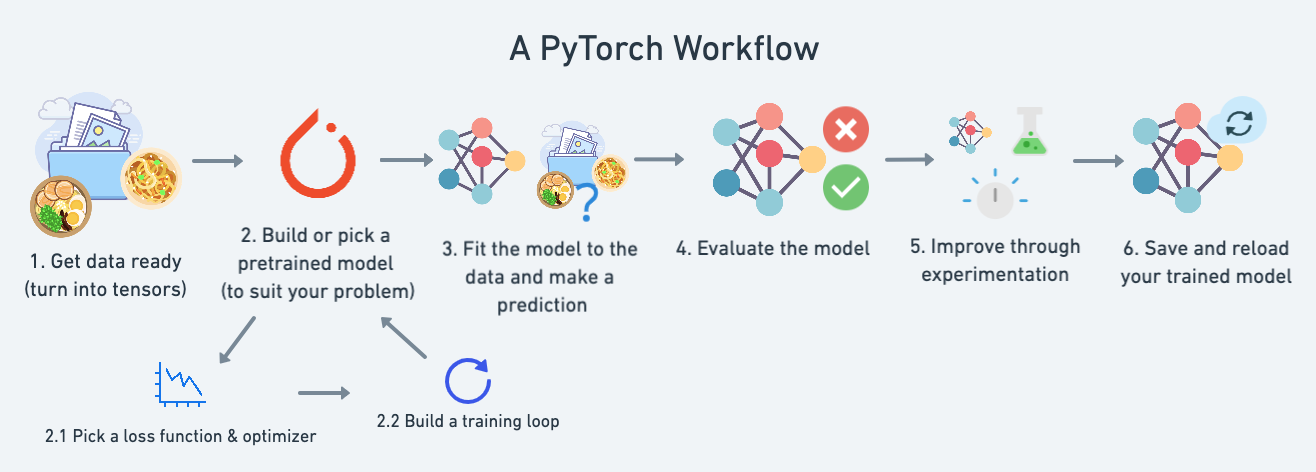

In [ ]:
topics_tobe_covered = {1: "data (preparing and loading)",
                  2: "building model",
                  3: "fitting the model to data",
                  4: "making prediction and evaluating a model(inference)",
                  5: "saving and loading a model",
                  6: "putting it all together"}
topics_tobe_covered

{1: 'data (preparing and loading)',
 2: 'building model',
 3: 'fitting the model to data',
 4: 'making prediction and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for Neural Network
import matplotlib.pyplot as plt

note : https://pytorch.org/docs/stable/nn.html



# 1. Data Preparing and Loading

Data can be of any format

1. Excel Spreadsheet
2. CSV file
3. Image of any format
4. Audio
5. DNA
6. Categorical data: Values that represent categories, such as gender or type of fruit
7. Time series data: A type of data used for machine learning

Machine learning is comprised of two parts

1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation


##Linear Regression -   

> Indented blocka statistical model that estimates the linear relationship between a scalar response and one or more explanatory variables. The goal of linear regression is to find the best-fit line, which means minimizing the error between the predicted and actual values.

Given a data set {yi, xi1, xi2, xi3,... xip}(i=i to n) of n statistical units, a linear regression model assumes that the relationship between the dependent variable y and the vector of regressors x is linear. This relationship is modeled through a disturbance term or error variable ε — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form

image.png

where T denotes the transpose, so that xiTβ is the inner product between vectors xi and β.

Often these n equations are stacked together and written in matrix notation as


> ## **y = Xβ + ε**

where,

Yi =

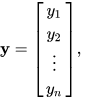

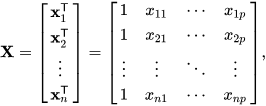


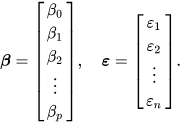

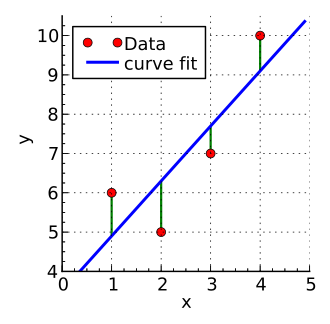

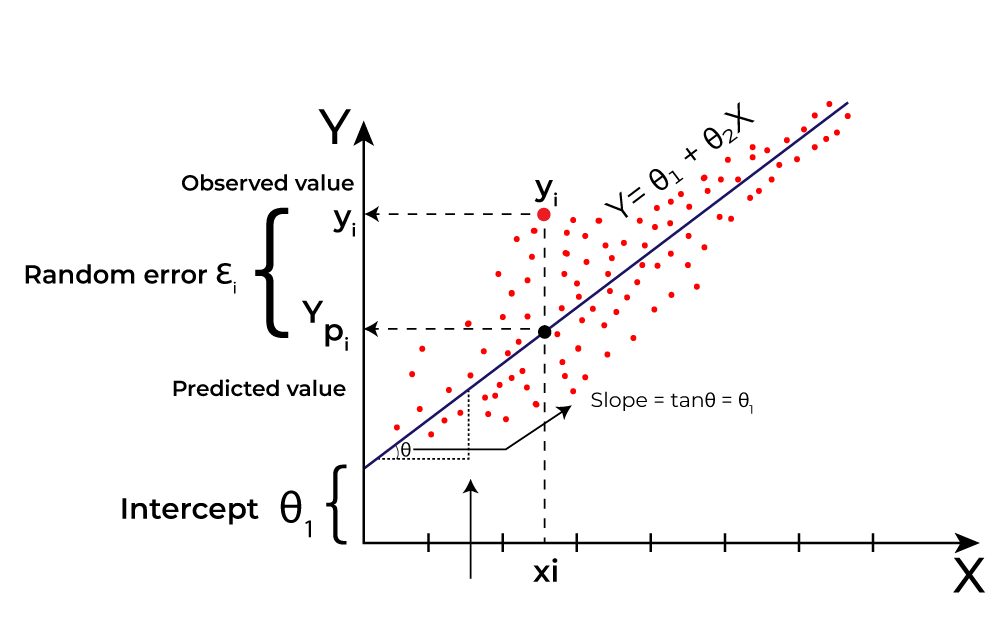

In [ ]:
# we will use a linear regression formula of known slope/parameter
weight = 0.7
bias = 0.3

#create a tensor
#here we are using a vector but later on we will use tensor and matrix
#this is why X is taken and not x
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias #tensor operations to get y
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

###Splitting data in Test and Training Set (an important concept in ML)

The data is split into three sets -
> 1. **Training Set** - Training the model to develope a neural net which can detech a pattern in numbers of data set
 (~60-80%) Always

> 2. **Validation Set** -The model gets tuned on this data .Also to see if our model is not overfitted to the given data set in training. (~10-20%)

> 3. **Test Set** - finally to check the precision and accuracy of our model
~(10-20%) Always



In [ ]:
#create these data sets
train_set = int(0.8 * len(X))  #Use 80% of data for training
X_train, y_train = X[:train_set], y[:train_set]

X_test, y_test = X[train_set:], y[train_set:] #use rest 20% for testing

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

##Visualize the data with MatplotLib

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  #This function Plots the training data, test data and compare predictions

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  #Are there predictions? if Yes then do the following
  if predictions is not None:
    #Plot the prediction if they exists
    plt.scatter(test_data, predictions, c="k", s=4, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 14});

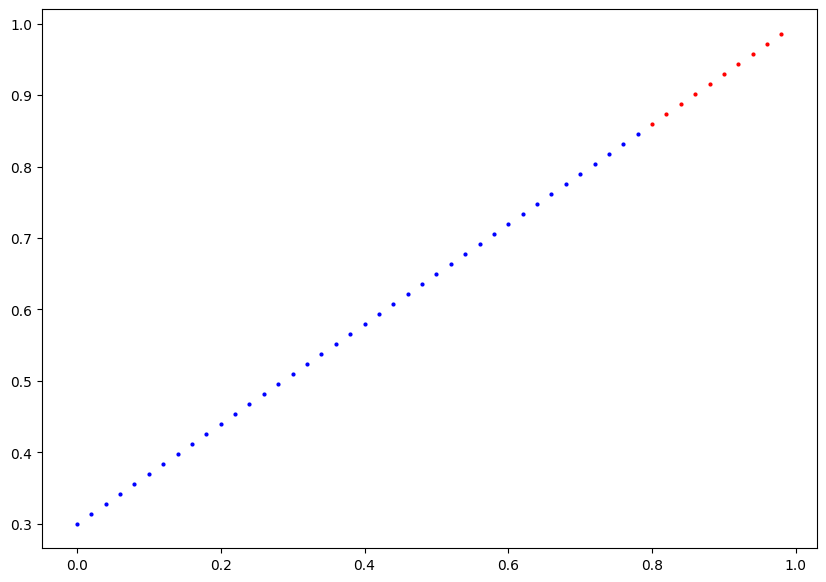

In [ ]:
plot_predictions();

##2. Building the PyTorch Model for Linear Regression

What our Model does :
1. Start with Random value (weight & bias ) with nn>Parameter
2. Look at the training data and adjust the random values to better represent the ideal values (weighs & bias)

It does so by

> i) Gradient Descent : 1. https://www.youtube.com/watch?v=IHZwWFHWa-w
                        2.  https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

> ii) Back Propagation : 1.  https://www.youtube.com/watch?v=Ilg3gGewQ5U
                        2. https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html

Resource for Python OOPs : https://realpython.com/python3-object-oriented-programming/

In [ ]:
from torch import nn

#Create Linear regression model class which is subclass of nn.Module
class Linear_Regression_Model(nn.Module):
  #class Linear_Regression_Model does public inheritance with nn.Module class in Pytorch

  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float32))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))

    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) ->torch.Tensor: #"x" is the input data of type torch.Tensor and forward function returns typetorch.Tensor(->)
    return self.weights * x + self.bias #this is the linear regression formula


##Note:
**Error :**
NotImplementedError, _forward_unimplemented(self, *input)
occurs if the indentation of def foward does not match with the def __init__(self) method


##Python model Building Essentials

* torch.nn - contains all of the buildings for computational graph (a neural network is a type of computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should override forward() method
*torch.optim - optimizer algorithms of Pytorch, and helps with gradient descent
*def forward() - All nn.Module subclasses require you to override forward(), and this method should contain the computational part of your model.

# Checking the contents of Pytorch Model



Using `.parameters()` we can check whats inside our model

In [ ]:
#creating a random seed
torch.manual_seed(42)

#create an instance/object of the model(subclass of base class nn.Module)
model_0 = Linear_Regression_Model()

#check our the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#the values predicted by the model which doesnt know the ideal values
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#the ideal values for weight and bias
print("Ideal Values for weight and bias : ")
print(f"weight : {weight}, \nbias : {bias}")

Ideal Values for weight and bias : 
weight : 0.7, 
bias : 0.3


##Making Predictions using `torch.inference_mode()`

To check the model's predictive power, lets see how well it predicts y_test based on X_test.
When we pass data through our model, its going to run it through the `forward()` method

In [ ]:
print(f"Input {X_test}, \nIdeal Output {y_test}")

Input tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]), 
Ideal Output tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [ ]:
#Make prediction with test_set
with torch.inference_mode():
  y_preds = model_0(X_test)

#older codes uses torch.no_grad which does the same of no keeping track of gradients
#but torch.inference does more than that. Thus its preferred...
with torch.no_grad():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

##Note on inference mode :
We could have just used y_preds = model_0(X_test)
But with inference mode, `the tracking of gradients gets turned off`, this makes the model run faster.

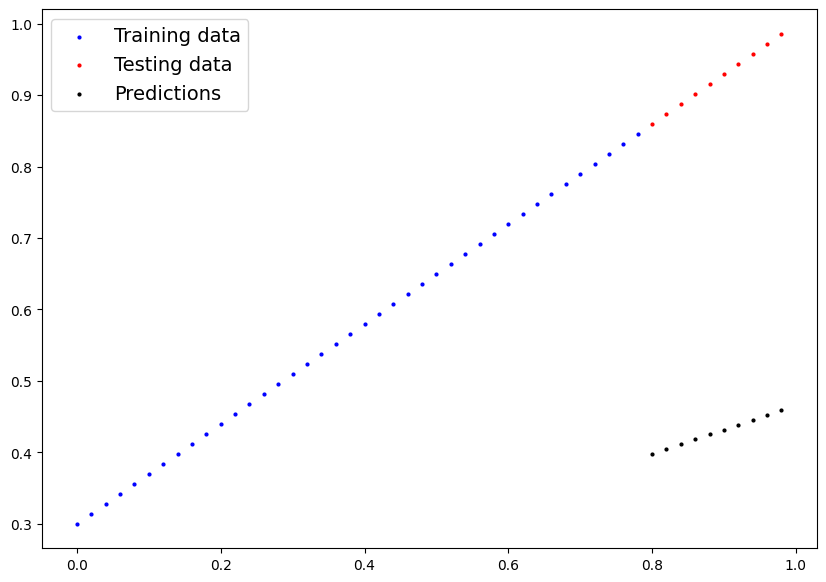

In [ ]:
plot_predictions(predictions=y_preds)

#right now we are just plotting random values that obey the straight line equation
#to actually reach the optimal solution we need Optimization techniques

# 3. Train Model (with loss/cost function)

Now we need to make the model to understand the difference between a good prediction and bad prediction.


One of ways to implement that is use to use a `cost/loss function`

Things we need :    
* **Loss Function** :  A function to measure the error in prediction from Ideal Output/True Label
* **Optimizer** Takes into account the loss of model and adjust the model's parameter (eg: weights and bias) to improve our loss function

Specifically for Pytorch we need :    
* **training loop**
* **testing loop**

**Resources**
Theory : https://www.datacamp.com/tutorial/loss-function-in-machine-learning
>>>> https://medium.com/@zeeshanmulla/cost-activation-loss-function-neural-network-deep-learning-what-are-these-91167825a4de

Graphs : https://builtin.com/machine-learning/common-loss-functions

In [ ]:
#Setup a loss Function
# we will be using the Mean Absolute Error (MAE) or L1 loss function

loss_fn = nn.L1Loss()

#Set up optimizer
#in this model we will use Stochastic Gradient Descent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001 #learning rate(a hyperparameter
                            )

Inside the Optimizer we get to see the following options
> * `params` - the model parameters to optimize
> * `lr` - learning rate is a hyperparameter which dictates the gradient descent step to be taken after every mini-batch of data processed. In SGD the gradient it multiplied with `lr` and then subtracted/added to the parameter accordingly. Large learning rate means less time taken, less accurate due to big steps and small learning rate means small steps, more time taken but accurate predictions.

>>>v(t+1) = =μ∗v(t)+lr∗g (t+1)

>>>p (t+1) = p(t) − v (t+1)



Which loss function and the optimizer to use is experimental but usually certain type of models work best with a specific loss function and optimizer. For example :
* Linear Regression Models usually uses - Root Mean Square or Mean Absolute Error(MAE or L1 loss) (`torch.nn.L1Loss()`)function and Stochastic Gradient Descent (`torch.nn.SGD`)as Optimizer
* Multi-Classification Models uses - binary cross-entropy and sparse categorical cross-entropy(`.nn.BCSLoss()`) as loss function and Adam (`torch.optim.Adam`)as optimizer

# Building a training and testing Loop

What we need in a training loop:

1. Loop through the data
2. Forward pass(involves moving data through our model's `forward()` function to make predictions on data - also called `forward propagation` )
3. Calculate the loss(compare forward pass prediction to ground truth labels)
4. Loss Backward - `backpropagation` (moves backward through the network to calulate the gradients of each neuron of our model and suggest changing weights and biases of previous layer)
5. Optimizer step `gradient descent`

What we need in Testing Loop:

Resource -
`Bias and Variance in ML` - https://www.youtube.com/watch?v=EuBBz3bI-aA (StatQuest)

`Standard Deviation and Variance` - https://www.mathsisfun.com/data/standard-deviation.html

In [ ]:
torch.manual_seed(1)

#epoch is an hyperparameter: which gives us the number of loop though the data
epochs = 5000

#tracking values
epoch_count = []
loss_values = []
test_loss_values = []


#########---------TRAINING---------------#############

for epoch in range(epochs):

  #Set the model to training mode
  model_0.train() #train mode in Pytorch sets all parameters which requires gradient, sets it to True

  #1. Forward Pass

  y_pred = model_0(X_train)

  #2. calculate the loss

  loss = loss_fn(y_pred, y_train)
  print(f"Error in predicted value : {loss}")

  #3 Optimizer zero_grade

  optimizer.zero_grad()
  #Resets the gradients of all optimized torch.Tensors.set_to_none(bool) –
  #instead of setting to zero, set the grads to None.


  #4 Perform backpropagation on loss wtf parameters of model

  loss.backward()


  #5 Step the optimizer (perform gradient descent)

  optimizer.step()
  #by default how the optimizer changes
  #will accomodate through the loop so...
  #we have to zero them in step 3 in next iteration


  #########-----------TESTING-----------##########
  model_0.eval() #turns off the different settings such as gradient calculation mode not needed for evaluation/

  with torch.inference_mode(): #turns of gradient tracking

      #1. Do the forward pass
      test_pred = model_0(X_test)

      #2. Caculate the loss
      test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f" Epoch :   {epoch} | Loss : {loss}  | Test loss : {test_loss}")

  #print the state
  print(f" Model params update to : {model_0.state_dict()}")



Streaming output truncated to the last 5000 lines.
Error in predicted value : 0.0007075972971506417
 Model params update to : OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Error in predicted value : 0.0004444979131221771
 Epoch :   2620 | Loss : 0.0004444979131221771  | Test loss : 0.0005780101055279374
 Model params update to : OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Error in predicted value : 0.0007075972971506417
 Model params update to : OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Error in predicted value : 0.0004444979131221771
 Model params update to : OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Error in predicted value : 0.0007075972971506417
 Model params update to : OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Error in predicted value : 0.0004444979131221771
 Model params update to : OrderedDict([('weights', tensor([0.6997])), ('bias

Ideal value (0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

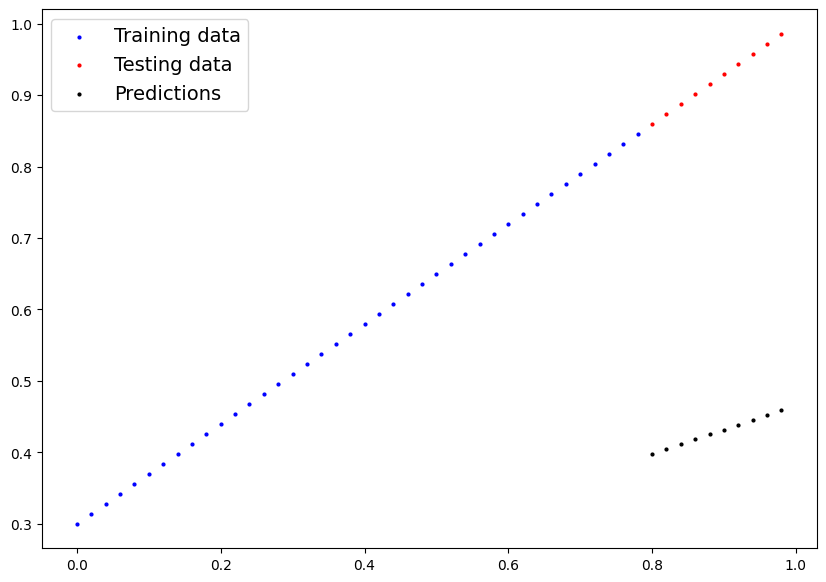

In [ ]:
#Old Prediction without training
plot_predictions(predictions=y_preds)


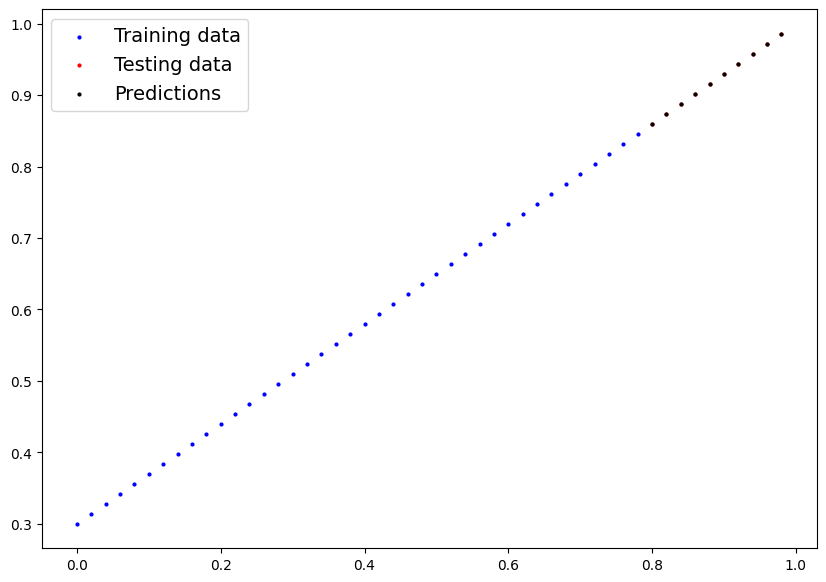

In [ ]:
#New Predictions with training and testing for 10000 epochs
plot_predictions(predictions=y_preds_new)

In [ ]:
print(epoch)
print(loss_values)
print(test_loss_values)

4999
[tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.3014, grad_fn=<MeanBackward0>), tensor(0.2898, grad_fn=<MeanBackward0>), tensor(0.2783, grad_fn=<MeanBackward0>), tensor(0.2668, grad_fn=<MeanBackward0>), tensor(0.2553, grad_fn=<MeanBackward0>), tensor(0.2438, grad_fn=<MeanBackward0>), tensor(0.2322, grad_fn=<MeanBackward0>), tensor(0.2207, grad_fn=<MeanBackward0>), tensor(0.2092, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.1862, grad_fn=<MeanBackward0>), tensor(0.1746, grad_fn=<MeanBackward0>), tensor(0.1631, grad_fn=<MeanBackward0>), tensor(0.1516, grad_fn=<MeanBackward0>), tensor(0.1401, grad_fn=<MeanBackward0>), tensor(0.1285, grad_fn=<MeanBackward0>), tensor(0.1170, grad_fn=<MeanBackward0>), tensor(0.1065, grad_fn=<MeanBackward0>), tensor(0.0975, grad_fn=<MeanBackward0>), tensor(0.0897, grad_fn=<MeanBackward0>), tensor(0.0831, grad_fn=<MeanBackward0>), tensor(0.0773, grad_fn=<MeanBackward0>), tensor(0.0724, grad_fn=<MeanBackward0>), tensor(0.0

In [ ]:
import numpy as np

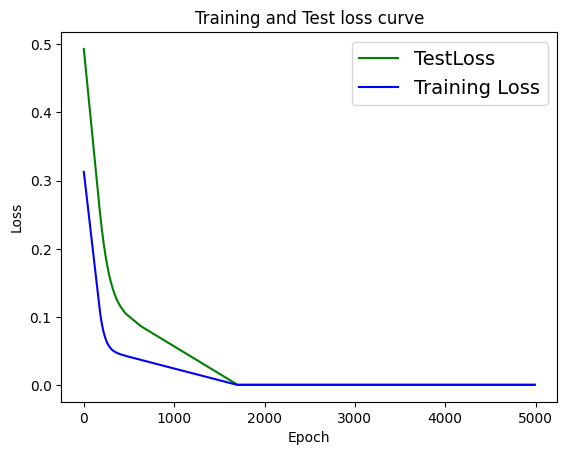

In [ ]:
#Plot Loss curve

plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="TestLoss", c="g")
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training Loss", c="b")
plt.title("Training and Test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(prop={"size": 14});

##Saving a Model in PyTorch

There are 3 main methods to save a model

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object.Uses pickle’s unpickling facilities to deserialize pickled object files to memory.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved data dictionary

Note: https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model

In [ ]:
#Saving Model to Path
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model's state_dict()

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

torch.save(model_0, MODEL_SAVE_PATH)
MODEL_SAVE_PATH

Saving model to: models/01_pytorch_workflow_0.pth


PosixPath('models/01_pytorch_workflow_0.pth')

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2220 Mar 20 14:49 01_pytorch_workflow_0.pth


###Loading a Pytorch Model

In [ ]:
loaded_model_0 = Linear_Regression_Model()
loaded_model_0 = torch.load(f=MODEL_SAVE_PATH)
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

# 6. Putting it All Together

Lets go back through all the steps and see the entire code in one piece

In [ ]:
#Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

Create device-agnostic code

This means if we have access to GPU, our code will use it. Otherwise it will use CPU

In [ ]:
#Setup the device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


## 6.1 Graph and Data Split

In [ ]:
#create some data using the linear regression formula of y = weight(w)* feature(x) + bias(b)
weight = 0.1
bias = 0.4

start = 0
end = 1
step = 0.01

#Creating X(feature) and y(labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.4000],
         [0.4010],
         [0.4020],
         [0.4030],
         [0.4040],
         [0.4050],
         [0.4060],
         [0.4070],
         [0.4080],
         [0.4090]]))

In [ ]:
#Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
#Plot data function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  #This function Plots the training data, test data and compare predictions

  #plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=1, label="Training data")

  #Plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=1, label="Testing data")

  #Are there predictions? if Yes then do the following
  if predictions is not None:
    #Plot the prediction if they exists
    plt.scatter(test_data, predictions, c="k", s=1, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 14});


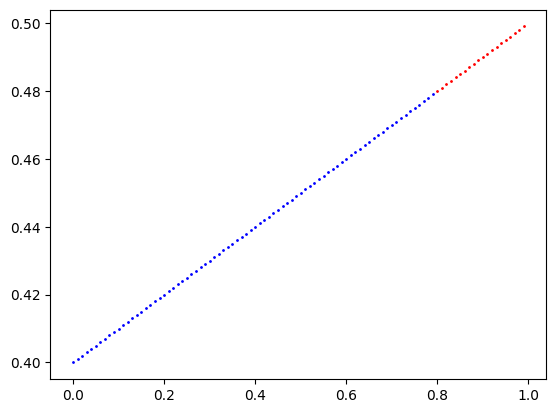

In [ ]:
#Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Create Linear Regression Model class

We are using `nn.Linear()` as opposed to setting each for bias and weight with `nn.Parameters()`

In [ ]:
#Create a linear model by subclassing nn.Module

class Linear_Regression_Model_V2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is tensor and function return type is also tensor
    return self.linear_layer(x)

#Set manual_seed
torch.manual_seed(42)
model_1 = Linear_Regression_Model_V2()
model_1, model_1.state_dict()

(Linear_Regression_Model_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notes : https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.4000],
         [0.4010],
         [0.4020],
         [0.4030],
         [0.4040]]))

In [ ]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model device to gpu target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

For training we need:
* Loss Function
* Optimizer
* Training loop
> 1. Forward Pass
> 2. Calculate Loss
> 3. Set grad to zero
> 4. Backpropagation
> 5. Call optimizer and step accordingly

* Test loop
> 1. set model to testing mode
> 2. forward propagation
> 3. Calculate loss

In [ ]:
#Setup the Loss Function
loss_fn = nn.L1Loss() #MAE loss function

#Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0115)

In [ ]:
#Training Loop

torch.manual_seed(42)

epochs=300
#tracking values
epoch_count = []
loss_values = []
test_loss_values = []


#Put data on the target device (gpu)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
test_pred = test_pred.to(device)

for epoch in range(epochs):
  #Set model to train
  model_1.train()

  #1. Forward-propagation
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. backpropagation with loss
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ##Testing

  #Set Model to evaluation mode
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    #calculate the loss with train data
    test_loss = loss_fn(test_pred, y_test)

  #Print out the data

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f" Epoch : {epoch} , Train Loss : {loss} , Test loss : {test_loss}")
    print(model_1.state_dict())

 Epoch : 0 , Train Loss : 0.6925005912780762 , Test loss : 1.0092042684555054
OrderedDict([('linear_layer.weight', tensor([[0.7600]], device='cuda:0')), ('linear_layer.bias', tensor([0.8185], device='cuda:0'))])
 Epoch : 10 , Train Loss : 0.5595576167106628 , Test loss : 0.8535486459732056
OrderedDict([('linear_layer.weight', tensor([[0.7146]], device='cuda:0')), ('linear_layer.bias', tensor([0.7035], device='cuda:0'))])
 Epoch : 20 , Train Loss : 0.4266146123409271 , Test loss : 0.6978930830955505
OrderedDict([('linear_layer.weight', tensor([[0.6691]], device='cuda:0')), ('linear_layer.bias', tensor([0.5885], device='cuda:0'))])
 Epoch : 30 , Train Loss : 0.2936716079711914 , Test loss : 0.542237401008606
OrderedDict([('linear_layer.weight', tensor([[0.6237]], device='cuda:0')), ('linear_layer.bias', tensor([0.4735], device='cuda:0'))])
 Epoch : 40 , Train Loss : 0.16489095985889435 , Test loss : 0.39008840918540955
OrderedDict([('linear_layer.weight', tensor([[0.5784]], device='cuda:

## 6.4 Graphing Loss Curve and Training vs Predicted Labels Graph

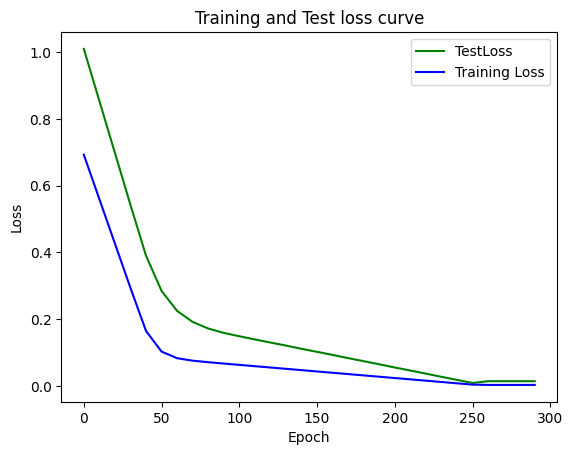

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="TestLoss", c="g")
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training Loss", c="b")
plt.title("Training and Test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(prop={"size": 10});

**Convergence at 250 epochs**

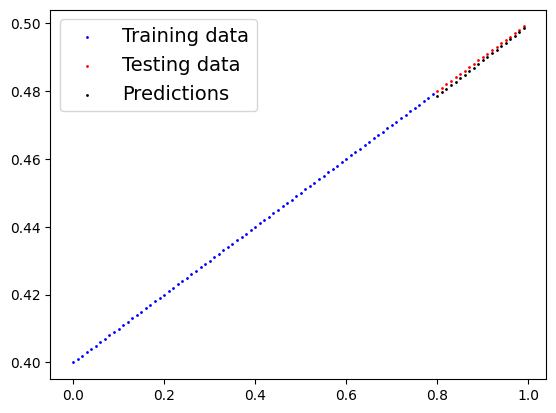

In [ ]:
with torch.inference_mode():
  y_preds_new = model_1(X_test).cpu()
plot_predictions(predictions=y_preds_new)

**Prediction precision increased for learning rate lr = 0.0115**
 > * for < 0.0115 prediction points are above the training data line
 > * for > 0.0115 prediction points are below the training data line

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3947], device='cuda:0'))])

In [ ]:
bias, weight

(0.4, 0.1)

##6.5 Saving and Loading trained model

In [ ]:
from pathlib import Path

#1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH /  MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to :  {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to :  models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3947], device='cuda:0'))])

In [ ]:
#Load a Pytorch

#Create a new instance of linear regression model V2
loaded_model_1 = Linear_Regression_Model_V2()

#Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put loaded model to device
loaded_model_1.to(device)

Linear_Regression_Model_V2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3947], device='cuda:0'))])

In [ ]:
#Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_y_preds = loaded_model_1(X_test)

loaded_y_preds.squeeze()

tensor([0.4785, 0.4796, 0.4806, 0.4817, 0.4827, 0.4838, 0.4848, 0.4859, 0.4869,
        0.4880, 0.4890, 0.4901, 0.4911, 0.4921, 0.4932, 0.4942, 0.4953, 0.4963,
        0.4974, 0.4984], device='cuda:0')